In [1]:
#https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f
#https://github.com/tthustla/efficient_frontier/blob/master/Efficient%20_Frontier_implementation.ipynb
#https://aroussi.com/post/python-yahoo-finance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#source: https://www.betterment.com/recommended-portfolio-funds/
#https://investorjunkie.com/reviews/betterment/
betterment = yf.download(tickers = 'VTI VTV VOE VBR VEA VWO AGG MUB VTIP HYLB SHV JPST BNDX EMB CAPE',
                         start="2015-01-01", end="2019-12-31")
#period="5y" or start="2015-01-01", end="2019-12-31"
'''
Stocks: U.S. Total Stock Market, U.S. Value Stocks - Large Cap, U.S. Value Stocks - Mid Cap, U.S. Value Stocks - Small Cap,
International Developed Market Stocks, International Emerging Market Stocks
Fixed income: U.S. High Quality Bonds, U.S. Municipal Bonds, U.S. Inflation-Protected Bonds, U.S. High-Yield Corporate Bonds,
U.S. Short-Term Treasury Bonds, U.S. Short-Term Investment-Grade Bonds, International Developed Market Bonds,
International Emerging Market Bonds
'''
table = betterment['Adj Close']
table.head()

[*********************100%***********************]  15 of 15 completed


,AGG,BNDX,CAPE,EMB,HYLB,JPST,MUB,SHV,VBR,VEA,VOE,VTI,VTIP,VTV,VWO
Date,,,,,,,,,,,,,,,
2014-12-31,96.286240,46.953007,77.750000,85.217064,NaN,NaN,97.421288,104.520882,95.325340,32.459141,79.704987,95.806892,45.140984,73.623405,34.734234
2015-01-02,96.557312,47.165188,77.629997,84.914139,NaN,NaN,97.174072,104.501923,95.000885,32.296322,79.704987,95.734566,45.225208,73.640839,34.334988
2015-01-05,96.767136,47.147507,76.349998,84.370453,NaN,NaN,97.385986,104.501923,93.342575,31.576527,78.332458,94.089577,45.178410,72.281479,33.788197
2015-01-06,97.011963,47.253593,76.040001,84.106346,NaN,NaN,97.659683,104.511406,92.017761,31.225206,77.521378,93.167686,45.075478,71.645348,33.623295
2015-01-07,96.994484,47.218216,76.820000,85.162704,NaN,NaN,97.898056,104.511406,92.937012,31.559397,78.394829,94.279396,45.150337,72.447037,34.395744


In [49]:
data1 = yf.download(tickers = 'VTI VTV VOE VBR VEA VWO AGG MUB VTIP HYLB SHV JPST BNDX EMB GEM',
                         start="2015-01-01", end="2019-12-31")
data2 = yf.download(tickers = 'VTI VTV VOE VBR VEA VWO AGG MUB VTIP HYLB SHV JPST BNDX EMB',
                         start="2015-01-01", end="2019-12-31")

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  14 of 14 completed


In [38]:
#source: https://investorjunkie.com/reviews/wisebanyan/
wiseBanyan = yf.download(tickers = 'SCHB SCHF IEMG TIP LQD VCSH SJNK HYS VGIT IYR IGV', start="2015-01-01", end="2019-12-31")
'''
Stocks: US, Foreign, Emerging Market
Bonds: US TIPS, Corporate, Short-Term Corporate, Short-Term High Yield, Short-Term High Yield, US Short-Term
Alternatives: Real Estate
'''
table = wiseBanyan['Adj Close']
table.head()

[*********************100%***********************]  11 of 11 completed


,HYS,IEMG,IGV,IYR,LQD,SCHB,SCHF,SJNK,TIP,VCSH,VGIT
Date,,,,,,,,,,,
2014-12-31,77.614983,41.310894,90.990753,63.239075,100.154320,45.007149,25.346939,21.477676,102.848358,70.314453,58.547688
2015-01-02,77.845909,40.924400,90.510284,64.020927,100.506607,44.952946,25.250498,21.559393,103.509445,70.243820,58.711094
2015-01-05,77.522644,40.300743,89.392509,64.234932,100.917564,44.185055,24.689375,21.485109,103.592087,70.270287,58.801876
2015-01-06,77.230125,40.089920,87.843323,64.704018,101.328568,43.751431,24.417580,21.395956,103.601288,70.358551,58.992550
2015-01-07,77.430260,40.915623,88.382599,65.543472,101.462761,44.266365,24.645538,21.462816,103.683899,70.455750,59.056065


In [90]:
#source: https://investorjunkie.com/reviews/schwab-intelligent-portfolios/
charlesSchwab = yf.download(tickers = 'SCHX FNDX SCHA FNDA SCHF FNDF SCHC FNDC SCHE FNDE SCHH VNQI SCHD VYMI MLPA SCHR SPIB VMBS SCHP HYLB BNDX EBND PSK BKLN VTEB PWZ IGV', 
                            start="2015-01-01", end="2019-12-31")
'''
Stocks: US Large Company, US Large Company — Fundamental, US Small Company, US Small Company — Fundamental,
International Developed Large Company, International Developed Large Company — Fundamental,
International Developed — Small Company, International Developed Small Company — Fundamental, International Emerging Markets,
International Emerging Markets — Fundamental, US Exchange-Traded REITS, International Exchange-Traded REITS,
US High Dividend, International High Dividend, Master Limited Partnerships (MLPs)
Fixed Income: US Treasurys, US Investment Grade Corporate Bonds, US Securitized Bonds, US Inflation Protected Bonds,
US Corporate High Yield Bonds, International Developed Country Bonds, International Emerging Markets Bonds,
Preferred Securities, Bank Loans, Investment Grade Municipal Bonds, Investment Grade California Municipal Bonds
'''
table = charlesSchwab['Adj Close']
table.head()

[*********************100%***********************]  27 of 27 completed


,BKLN,BNDX,EBND,FNDA,FNDC,FNDE,FNDF,FNDX,HYLB,IGV,...,SCHF,SCHH,SCHP,SCHR,SCHX,SPIB,VMBS,VNQI,VTEB,VYMI
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,19.207832,46.953007,25.101465,27.769459,23.118097,20.703621,22.444788,26.861460,NaN,90.990753,...,25.346939,33.767117,49.992596,48.698494,44.210125,29.393007,46.790493,42.229031,NaN,NaN
2015-01-02,19.175865,47.165188,24.951262,27.657825,23.046137,20.482615,22.409813,26.861460,NaN,90.510284,...,25.250498,34.590694,50.241455,48.771191,44.183102,29.470407,46.861088,42.426289,NaN,NaN
2015-01-05,19.127901,47.147507,24.712702,27.229883,22.776276,20.120173,21.780277,26.290699,NaN,89.392509,...,24.689375,34.477993,50.287540,48.880219,43.434994,29.478992,46.975849,42.110680,NaN,NaN
2015-01-06,19.071947,47.253593,24.624359,26.829859,22.551388,20.022928,21.544197,26.156923,NaN,87.843323,...,24.417580,34.824768,50.324398,49.098274,43.047424,29.573597,47.081779,41.921310,NaN,NaN
2015-01-07,19.063953,47.218216,24.924755,27.062431,22.749287,20.411896,21.719070,26.397718,NaN,88.382599,...,24.645538,35.362274,50.324398,49.116428,43.561195,29.573597,46.949364,42.568310,NaN,NaN


In [91]:
table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-12-31 to 2019-12-30
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BKLN    1258 non-null   float64
 1   BNDX    1258 non-null   float64
 2   EBND    1258 non-null   float64
 3   FNDA    1258 non-null   float64
 4   FNDC    1258 non-null   float64
 5   FNDE    1258 non-null   float64
 6   FNDF    1258 non-null   float64
 7   FNDX    1258 non-null   float64
 8   HYLB    766 non-null    float64
 9   IGV     1258 non-null   float64
 10  MLPA    1258 non-null   float64
 11  PSK     1258 non-null   float64
 12  PWZ     1258 non-null   float64
 13  SCHA    1258 non-null   float64
 14  SCHC    1258 non-null   float64
 15  SCHD    1258 non-null   float64
 16  SCHE    1258 non-null   float64
 17  SCHF    1258 non-null   float64
 18  SCHH    1258 non-null   float64
 19  SCHP    1258 non-null   float64
 20  SCHR    1258 non-null   float64
 21  SCHX    1258 non-nu

Text(0, 0.5, 'price in $')

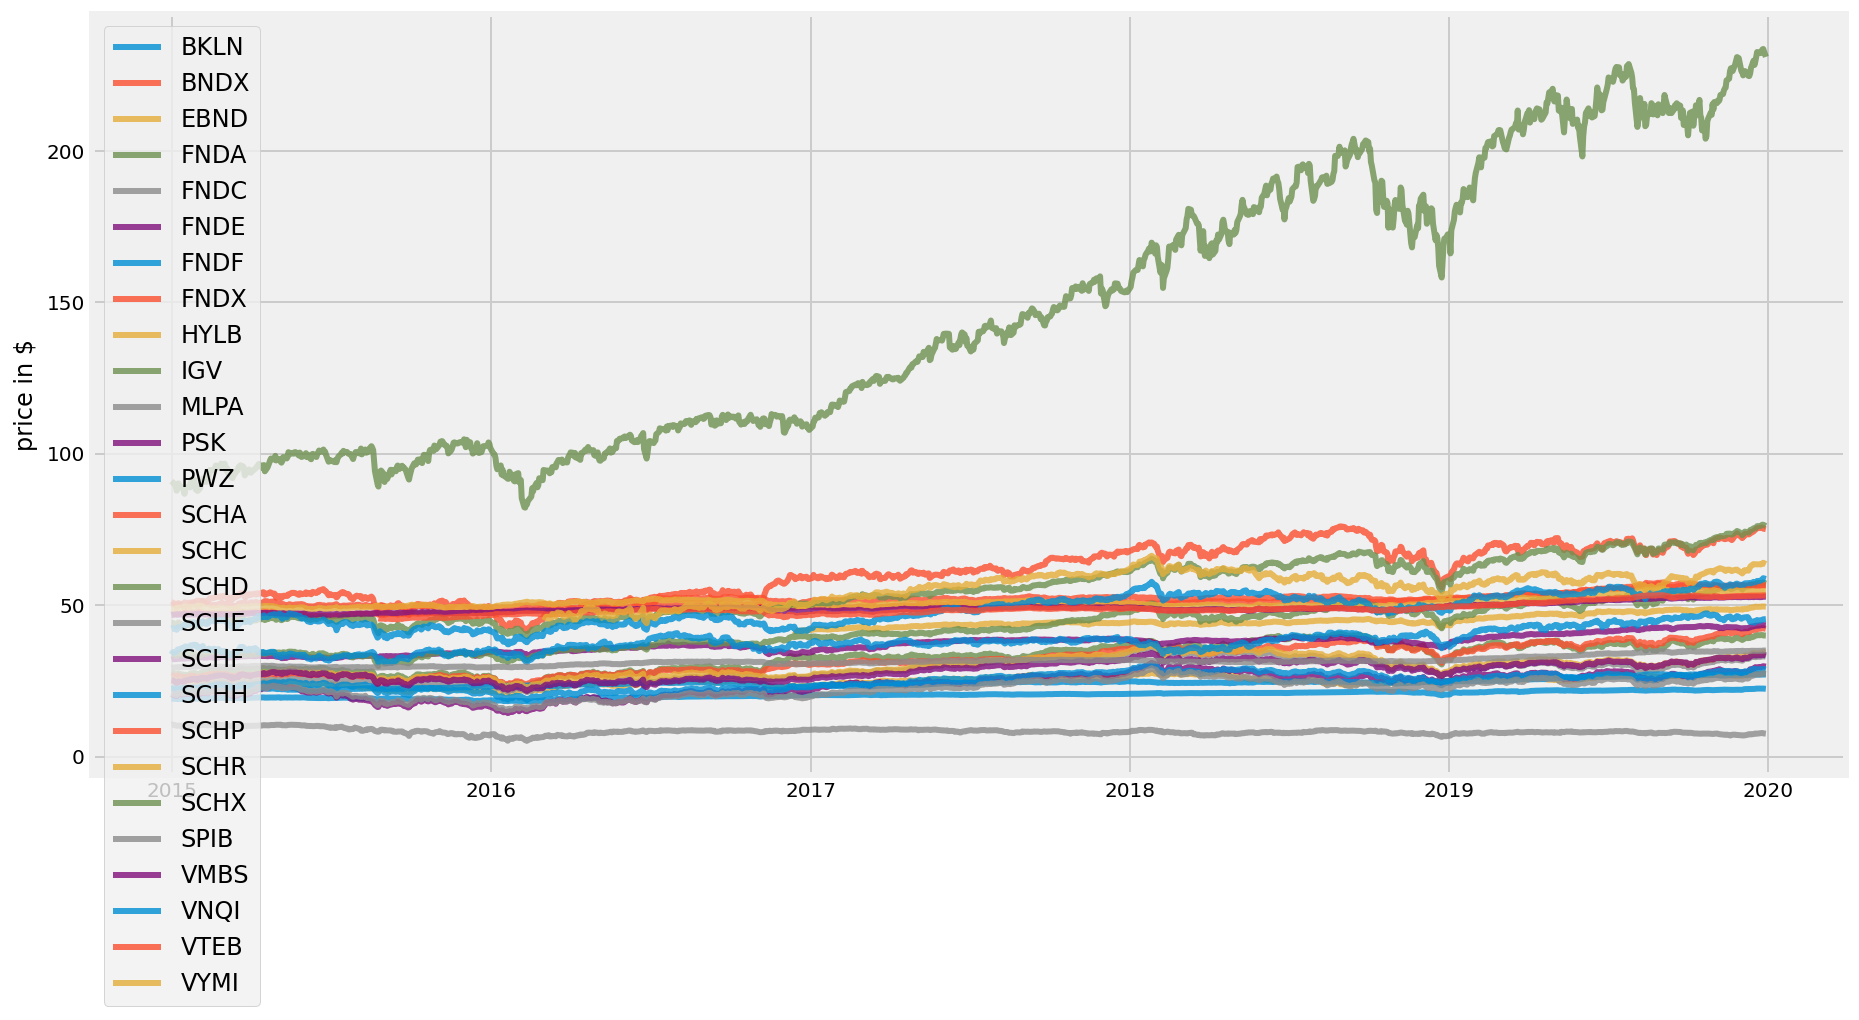

In [92]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

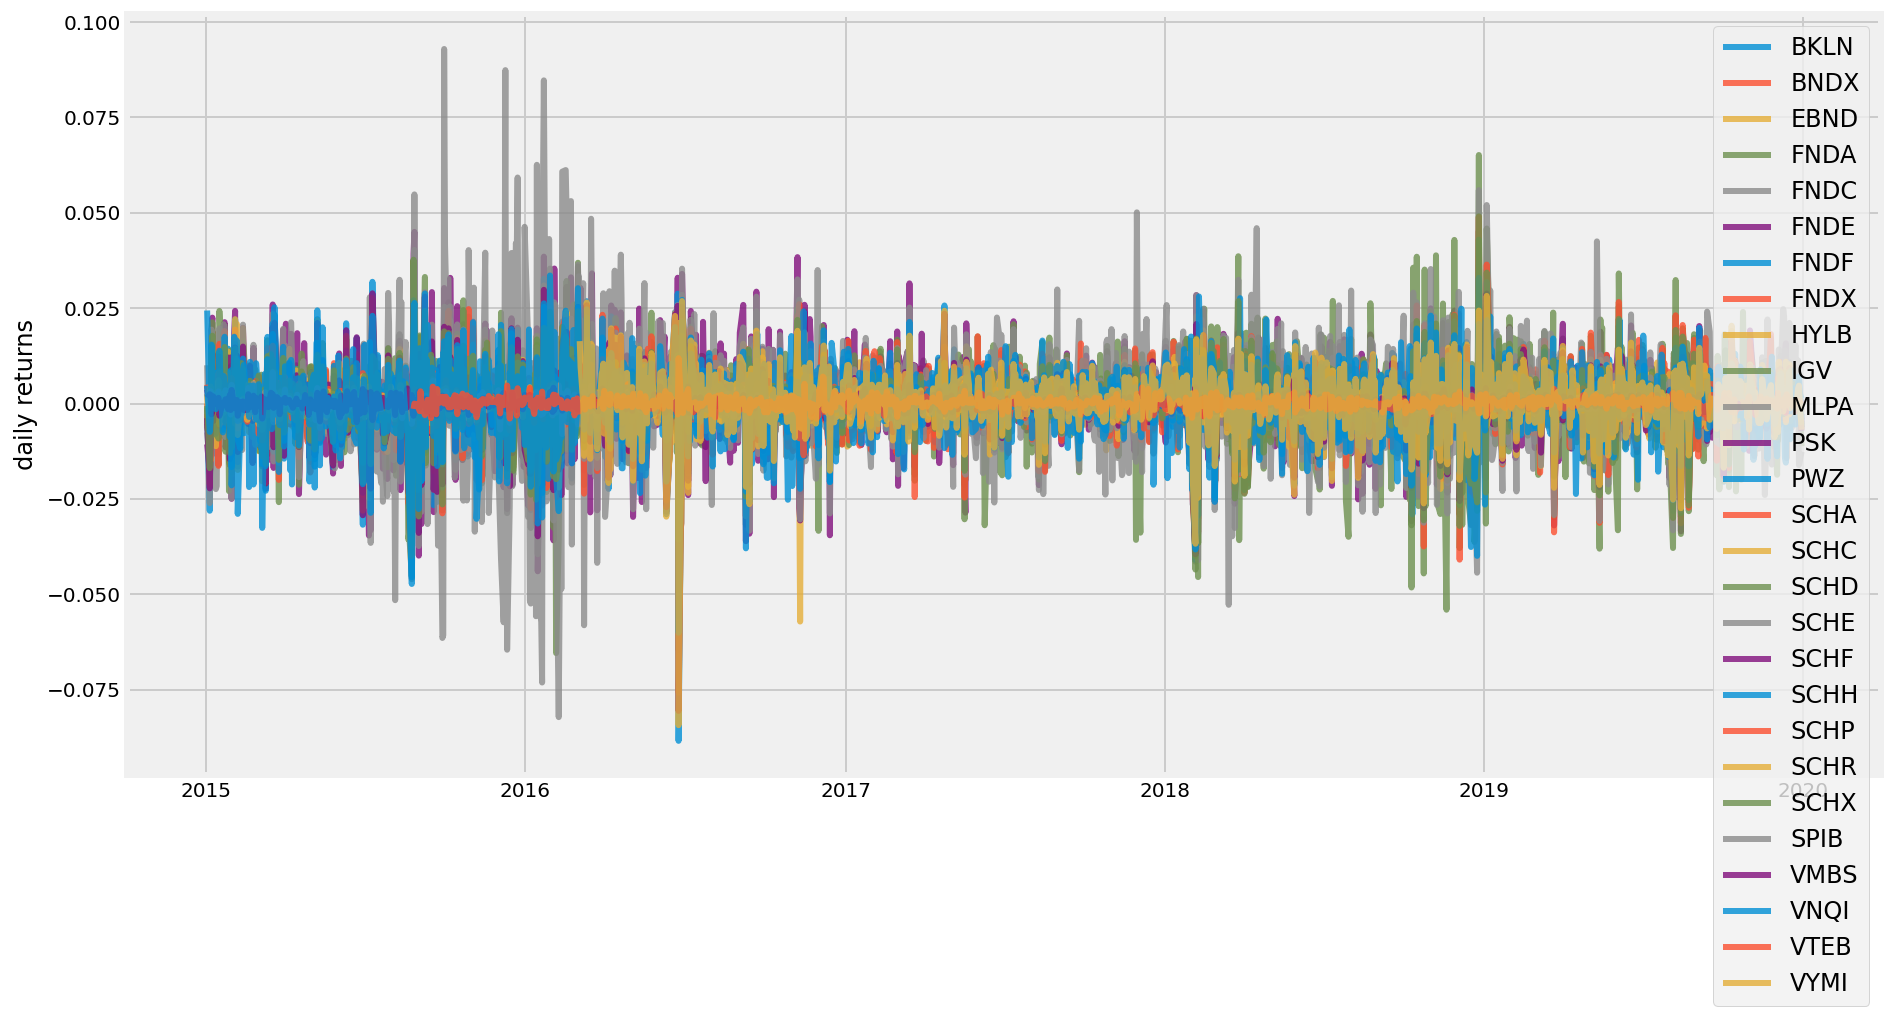

In [93]:
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [6]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns)) #Number of ETFs
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [96]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000*4
risk_free_rate = 0.0152 #2020/01/02 rate
#risk_free_rate = 0.0019 #2020/04/06 rate

In [8]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.06


            BKLN  BNDX  EBND  FNDA  FNDC  FNDE  FNDF  FNDX  HYLB   IGV  ...  \
allocation  8.28  8.09   1.4  2.41  0.74  2.78  0.05  2.99  7.13  7.72  ...   

            SCHF  SCHH  SCHP  SCHR  SCHX  SPIB  VMBS  VNQI  VTEB  VYMI  
allocation  0.35   0.8  7.24  3.59  6.19  1.65  2.42  3.35   7.8  2.53  

[1 rows x 27 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.05
Annualised Volatility: 0.05


            BKLN  BNDX  EBND  FNDA  FNDC  FNDE  FNDF  FNDX  HYLB   IGV  ...  \
allocation  2.95  8.69  6.71  1.74  2.06  1.89   0.6  0.37  2.69  0.76  ...   

            SCHF  SCHH  SCHP  SCHR  SCHX  SPIB  VMBS  VNQI  VTEB  VYMI  
allocation  0.51  4.67  7.44   8.7  1.89  4.93  1.01  2.52  7.18  5.37  

[1 rows x 27

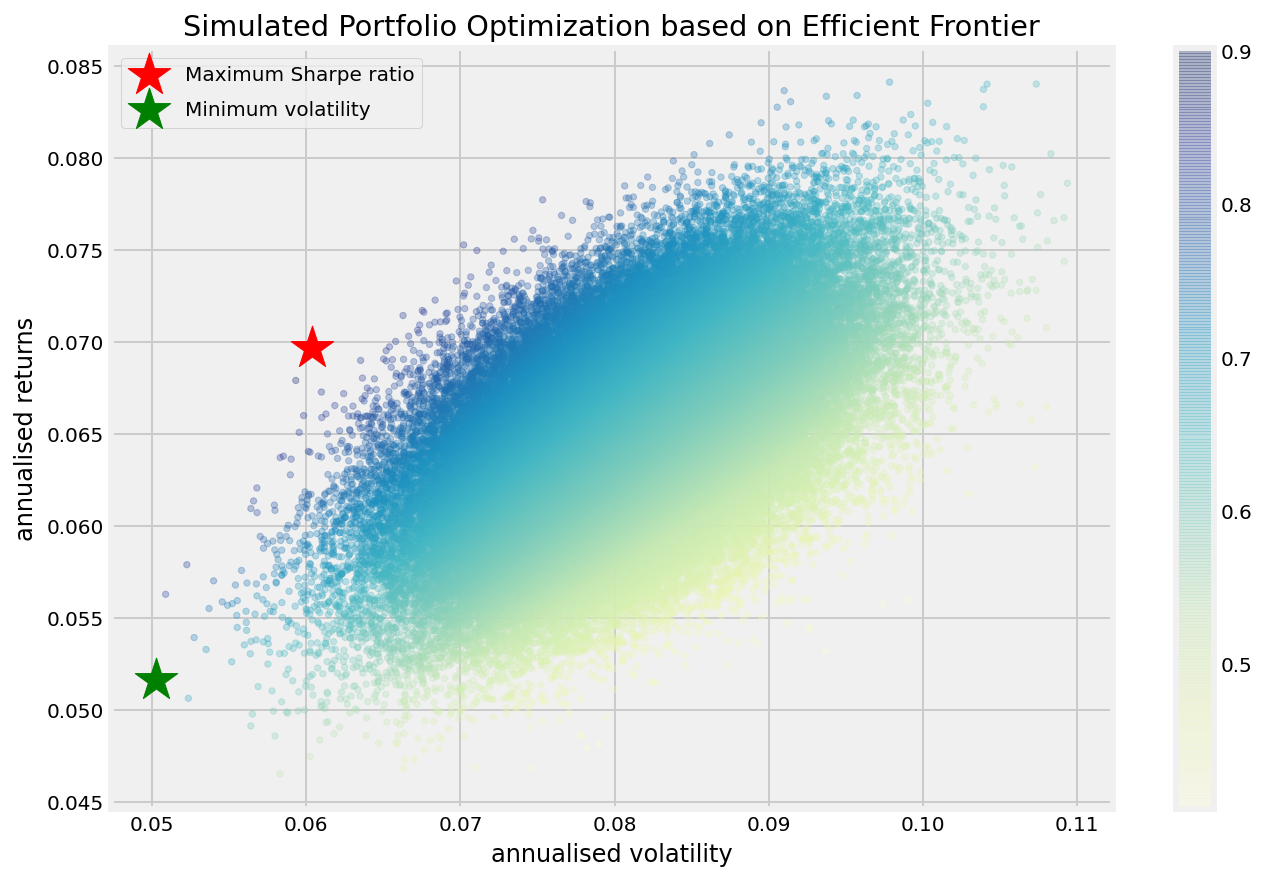

In [97]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [10]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [11]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [16]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [13]:
#for Compare
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    x0 = np.array([1.0 / num_assets for x in range(num_assets)])
    
    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]
    
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x)-target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, x0=x0,args=args, method='SLSQP',constraints=constraints, bounds=bounds)
    return result.fun

def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [102]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.14, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.05
Annualised Volatility: 0.02


            BKLN   BNDX  EBND  FNDA  FNDC  FNDE  FNDF  FNDX   HYLB  IGV  ...  \
allocation  0.23  19.95   0.0   0.0   0.0   0.0   0.0   0.0  20.77  4.8  ...   

            SCHF  SCHH  SCHP  SCHR  SCHX  SPIB  VMBS  VNQI   VTEB  VYMI  
allocation   0.0   0.0   0.0   0.0   0.0  9.63   0.0   0.0  31.57  0.51  

[1 rows x 27 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.03
Annualised Volatility: 0.02


             BKLN   BNDX  EBND  FNDA  FNDC  FNDE  FNDF  FNDX  HYLB  IGV  ...  \
allocation  29.03  12.06   0.0   0.0   0.0   0.0   0.0   0.0  6.56  0.0  ...   

            SCHF  SCHH  SCHP  SCHR  SCHX  SPIB   VMBS  VNQI   VTEB  VYMI  
allocation   0.0   0.0   0.0   0.0   0.0  0.03  25.05   0.0  27.07   0.0  

[1

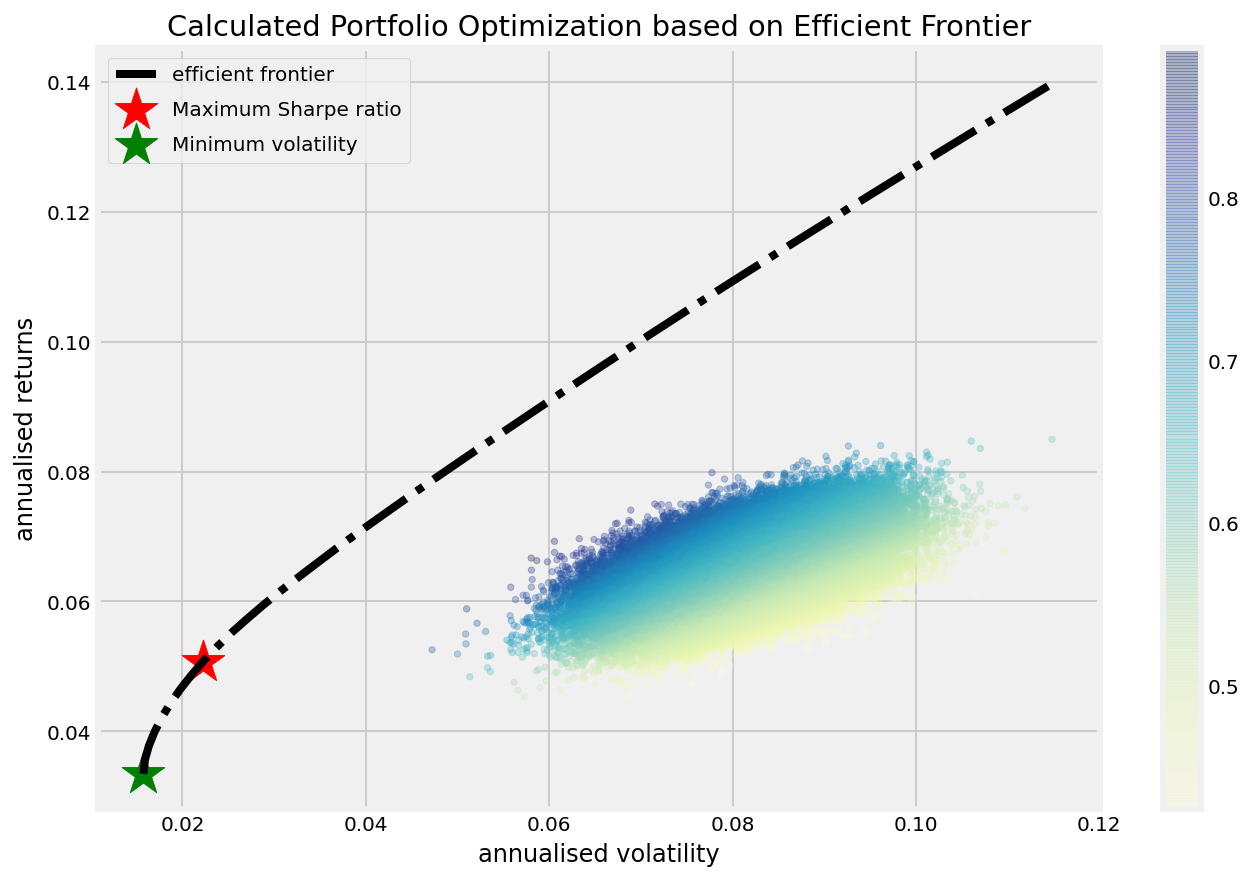

In [103]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [100]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.22, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.05
Annualised Volatility: 0.02


            BKLN   BNDX  EBND  FNDA  FNDC  FNDE  FNDF  FNDX   HYLB  IGV  ...  \
allocation  0.23  19.95   0.0   0.0   0.0   0.0   0.0   0.0  20.77  4.8  ...   

            SCHF  SCHH  SCHP  SCHR  SCHX  SPIB  VMBS  VNQI   VTEB  VYMI  
allocation   0.0   0.0   0.0   0.0   0.0  9.63   0.0   0.0  31.57  0.51  

[1 rows x 27 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.03
Annualised Volatility: 0.02


             BKLN   BNDX  EBND  FNDA  FNDC  FNDE  FNDF  FNDX  HYLB  IGV  ...  \
allocation  29.03  12.06   0.0   0.0   0.0   0.0   0.0   0.0  6.56  0.0  ...   

            SCHF  SCHH  SCHP  SCHR  SCHX  SPIB   VMBS  VNQI   VTEB  VYMI  
allocation   0.0   0.0   0.0   0.0   0.0  0.03  25.05   0.0  27.07   0.0  

[1

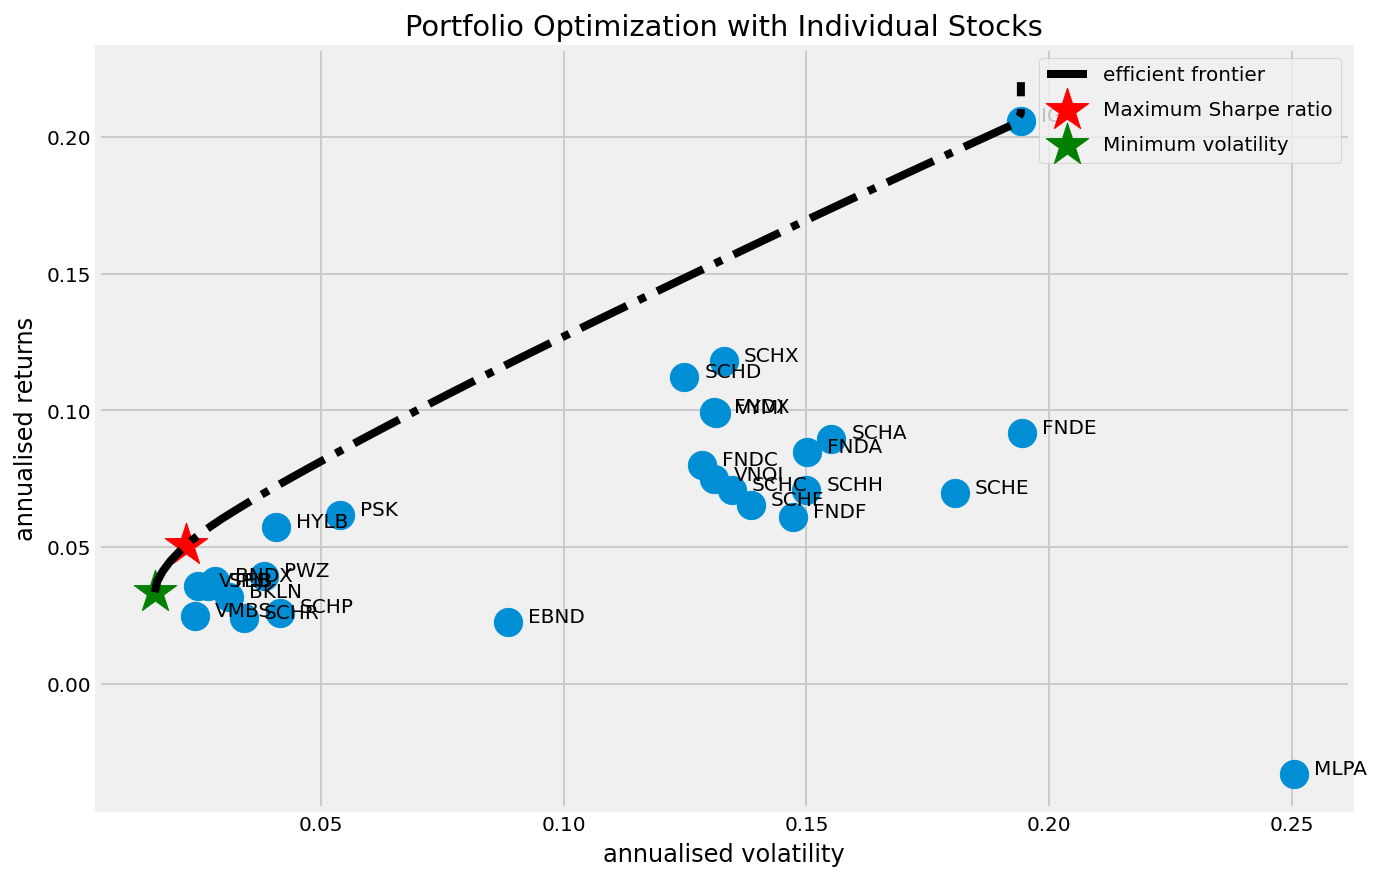

In [101]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

In [54]:
def metrics(data):
    returns = data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    num_portfolios = 25000
    risk_free_rate = 0.0152
    return returns,mean_returns,cov_matrix,num_portfolios,risk_free_rate

In [55]:
def display_simulated_ef_with_random_compare(data1,data2):
    returns1,mean_returns1,cov_matrix1,num_portfolios,risk_free_rate = metrics(data1)
    returns2,mean_returns2,cov_matrix2,num_portfolios,risk_free_rate = metrics(data2)
    
    results1, weights1 = random_portfolios(num_portfolios,mean_returns1, cov_matrix1, risk_free_rate)
    results2, weights2 = random_portfolios(num_portfolios,mean_returns2, cov_matrix2, risk_free_rate)
    #################################################################################################
    
    max_sharpe_idx1 = np.argmax(results1[2])
    sdp1, rp1 = results1[0,max_sharpe_idx1], results1[1,max_sharpe_idx1]
    max_sharpe_allocation1 = pd.DataFrame(weights1[max_sharpe_idx1],index=data1.columns,columns=['allocation'])
    max_sharpe_allocation1.allocation = [round(i*100,2)for i in max_sharpe_allocation1.allocation]
    max_allocation1 = max_sharpe_allocation1.T
    
    min_vol_idx1 = np.argmin(results1[0])
    sdp_min1, rp_min1 = results1[0,min_vol_idx1], results1[1,min_vol_idx1]
    min_vol_allocation1 = pd.DataFrame(weights1[min_vol_idx1],index=data1.columns,columns=['allocation'])
    min_vol_allocation1.allocation = [round(i*100,2)for i in min_vol_allocation1.allocation]
    min_allocation1 = min_vol_allocation1.T
    
    an_vol1 = np.std(returns1) * np.sqrt(252)
    an_rt1 = mean_returns1 * 252
    rt_max1= np.max(an_rt1)
    #################################################################################################
    max_sharpe_idx2 = np.argmax(results2[2])
    sdp2, rp2 = results2[0,max_sharpe_idx2], results2[1,max_sharpe_idx2]
    max_sharpe_allocation2 = pd.DataFrame(weights2[max_sharpe_idx2],index=data2.columns,columns=['allocation'])
    max_sharpe_allocation2.allocation = [round(i*100,2)for i in max_sharpe_allocation2.allocation]
    max_allocation2 = max_sharpe_allocation2.T
    
    min_vol_idx2 = np.argmin(results2[0])
    sdp_min2, rp_min2 = results2[0,min_vol_idx2], results2[1,min_vol_idx2]
    min_vol_allocation2 = pd.DataFrame(weights2[min_vol_idx2],index=data2.columns,columns=['allocation'])
    min_vol_allocation2.allocation = [round(i*100,2)for i in min_vol_allocation2.allocation]
    min_allocation2 = min_vol_allocation2.T
    
    an_vol2 = np.std(returns2) * np.sqrt(252)
    an_rt2 = mean_returns2 * 252
    rt_max2 = np.max(an_rt2)
   #################################################################################################
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol1,an_rt1,marker='o',s=200)
    ax.scatter(an_vol2,an_rt2,marker='x',s=200)

    for i, txt in enumerate(data1.columns):
        ax.annotate(txt, (an_vol1[i],an_rt1[i]), xytext=(10,0), textcoords='offset points')
    for i, txt in enumerate(data2.columns):
        ax.annotate(txt, (an_vol2[i],an_rt2[i]), xytext=(10,0), textcoords='offset points',color='r')
    
   #################################################################################################
    target1 = np.linspace(rp_min1, rt_max1, 50)
    target2 = np.linspace(rp_min2, rt_max2, 50)
    efficient_portfolios1 = efficient_frontier(mean_returns1, cov_matrix1, target1)
    efficient_portfolios2 = efficient_frontier(mean_returns2, cov_matrix2, target2)
    ax.plot(efficient_portfolios1, target1, linestyle='-.', color='black', label='efficient frontier1')
    ax.plot(efficient_portfolios2, target2, linestyle='-.', color='red', label='efficient frontier2')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

In [ ]:
display_simulated_ef_with_random_compare(data1,data2)